# Guided Project: Clean And Analyze Employee Exit Surveys

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

![banner](https://www.propelhr.com/hubfs/Six%20Key%20Elements%20of%20an%20Employee%20Exit%20Plan-916215-edited.jpg)

In this project, we'll try to answer the following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We will combine the results for both surveys to answer these questions. You can find description of the columns of the datasets in the README file.

Let's start by reading in the datasets and exploring them.

## Explore data

In [134]:
import pandas as pd
import numpy as np

In [135]:
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [136]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [137]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [138]:
dete_survey ['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [139]:
tafe_survey.isnull().head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Cleaning the data

From the above few cells we see:

- The `dete_survey` dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

To start, we'll handle the first two issues.

In [140]:
#First, let's re-open the dete_survey dataset
#but this time replace the 'Not stated' values with NaN

dete_survey = pd.read_csv("dete_survey.csv", na_values='Not Stated')
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


### DROP columns 

In [141]:
#Let's drop the columns which we will not use from the DETE survey:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis = 1)

This code can be used:

columns_to_drop = dete_survey.iloc[:,28:49] 
dete_survey_updated = dete_survey.drop(columns_to_drop, axis=1)

#Let's drop the columns which we will not use from the TAFE survey:

In [142]:
#Let's drop the columns which we will not use from the TAFE survey:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis = 1)

Above, we preformed some data cleaning steps:

- 'Not stated' in the dete survey was replaced with NaN.
- Columns which will not be used were dropped. The updated versions of the datasets were assigned to two new dataframes - `dete_survey_updated` and `tafe_survey_updated`.


## Renaming the columns

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different.

In [143]:
#Example: Cease Date should be updated to cease_date
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(" ","_").str.lower().str.strip()

In [144]:
dete_survey_updated.head(3)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [145]:
mapping = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'}

tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)

In [146]:
tafe_survey_updated.head(3)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN


In the above few cells, the names of the columns in both dataframes were updated.

## Filter the data

Next, let's remove more of the data we don't need. Our end goal is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

This means that we are only interesed in employees who have resigned: `Resignation`

In [147]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [148]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [149]:
# Fix column names in DETE, remove "-" and leave only first word in column name
# Pay attention to the order of the vectorized string methods, because we don't apply to the entire column name
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

In [150]:
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [151]:
#Filter the Data
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"] == "Resignation"].copy()

In [152]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

Above, two new dataframes were created - dete_resignations and tafe_resignations. They hold data only for those employees who resigned.

## Verify the data

Next, we'll focus on verifying that the years in the `cease_date` and `dete_start_date columns` make sense.

- Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [153]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
09/2010      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

In [154]:
# Filter year
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1]

In [155]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)

In [156]:
dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [157]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [158]:
tafe_resignations['cease_date'].astype(float).value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

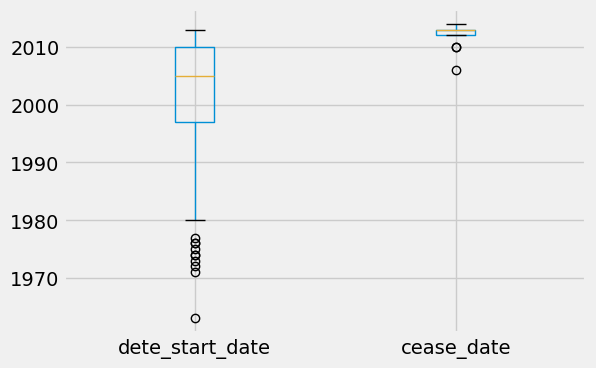

In [159]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

dete_resignations[['dete_start_date','cease_date']].plot(kind='box')

Above, we cleaned the columns of both dataframes which contain the start and cease date of the resigned employees. There do not appear to be any major issues with the values. The span of the cease years for both dataframes is a bit different:

- DETE: 2006 - 2014
- TAFE: 2009 - 2013

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

The TAFE dataset contains a column called `institute_service`. Unfortunately, the DETE dataset does not have such a column. We do, however, have the needed data to create this column. It should contain the difference between the `cease_date` and the `dete_start_date columns`.

In [160]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

## Identify dissatisfied employees

Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

 1. TAFE:
    - Contributing Factors. Dissatisfaction
    - Contributing Factors. Job Dissatisfaction
 2. DETE:
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload
    
If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied` in a new column.

We will start with TAFE data.

In [161]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [162]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

We need to convert these responses into boolean values and NaN. So we will now create a function to do the same. 

In [163]:
def update_vals(x):
    if pd.isnull(x):
        return np.nan
    elif x == '-':
        return False
    else:
        return True

In [164]:
tafe_cols = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']

#Updating the tafe_resignations column with bool
tafe_resignations[tafe_cols] = tafe_resignations[tafe_cols].applymap(update_vals)

In [165]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [166]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Now we can see that we have successfully converted the values to Bool. Now we can go ahead and apply our logic to find the disgruntled ones. Anyone who answers `True` will be marked as `dissatisfied`.

In [167]:
# Creating a new column called 'dissatisfied' to store the value

tafe_resignations['dissatisfied'] = tafe_resignations[tafe_cols].any(axis=1, skipna=False)

In [168]:
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

We can see that the new column has been created and it is storing the boolean values `dissatisfied`.

### Dissatisfied in DETE data set

Now we also perform the same steps with the DETE dataset. To do that we will have to find the index of the columns for easy manipulation.

In [169]:
dete_diss_columns = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment',
'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions',
'work_life_balance', 'workload']

dete_resignations['dissatisfied'] = dete_resignations[dete_diss_columns].any(axis='columns', skipna=False)

In [170]:
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [171]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

Above, we created a `dissatisfied` column in both dataframes. The values of the columns are either True or False based on the emplyees' response to the questions in the columns we identified above.

Additionally, we created copies of each dataframe.

## Combining the data

---
We are now ready to combine the two datasets we are working with into one. We will aggregate our dataset based on the `institute_service` column.
### Adding Institute identifier
To easily identify rows after aggregation, we will add an `institute` column for both datasets.

In [172]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"
## Combine
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [173]:
## Check for missing data
combined.notnull().sum().sort_values(ascending=False)

id                                                                           651
institute                                                                    651
separationtype                                                               651
dissatisfied                                                                 643
cease_date                                                                   635
position                                                                     598
employment_status                                                            597
age                                                                          596
gender                                                                       592
institute_service                                                            563
WorkArea                                                                     340
Institute                                                                    340
Contributing Factors. Study 

We can see that most of the columns that we need to further analyze have more than 500 non-null values. So we can set 500 as threshold to eliminate non-null values.

In [174]:
##Lọc dữ liệu 
combined_updated = combined.dropna(thresh = 500, axis =1).copy()
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10.0,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


In the above few cells we did the following:

- created an `institute` column in each dataset indicating where the employee worked;
- combined the two datasets into a new one called combined;
- removed any columns from the new dataset which had over 500 NaN values. The resulting dataset was assigned to combined_updated.

## Clean the 'institute_service' column

Next we need to clean the `institute_service` column as it contains values in a couple of different formats. To analyze the data, we'll convert these numbers into categories. We'll base our anlaysis on this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [175]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
36.0                   2
28.0                   2
30.0                   2
42.0                   1


In [176]:
combined_updated["institute_service"].unique()

array([7.0, 18.0, 3.0, 15.0, 14.0, 5.0, nan, 30.0, 32.0, 39.0, 17.0, 9.0,
       6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0,
       23.0, 13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 22.0, 28.0, 49.0,
       11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0, '3-4', '7-10',
       '1-2', 'Less than 1 year', '11-20', '5-6', 'More than 20 years'],
      dtype=object)

In [177]:
print(combined_updated["institute_service"].value_counts().sum())

563


We can see that there are two types of data in this column, one is a **number** while the other is a **range of years**. We can go ahead and categorize these into groups. 

We will follow the below mentioned definition to group. 

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

First we will extract the years from these values and then compare and group them into thier respective categories. 

In [178]:
## Extract the year, use str.extract("(\d+)") to filter ranges, we can get the smaller year in the strings
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract("(\d+)")
print(combined_updated['institute_service_up'].unique())
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')
## Kiểm tra
combined_updated['institute_service_up'].value_counts().sum()

['7' '18' '3' '15' '14' '5' nan '30' '32' '39' '17' '9' '6' '1' '35' '38'
 '36' '19' '4' '26' '10' '8' '2' '0' '23' '13' '16' '12' '21' '20' '24'
 '33' '22' '28' '49' '11' '41' '27' '42' '25' '29' '34' '31']


563

In [179]:
combined_updated['institute_service_up'].value_counts().head()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
Name: institute_service_up, dtype: int64

In [180]:
# Categorize the working year into segments:
def transform_service(x):
    if pd.isnull(x):
        return np.nan
    elif x < 3:
        return 'New'
    elif 3 <= x < 7:
        return 'Experienced'
    elif 7 <= x < 11:
        return 'Established'
    else:
        return 'Veteran'

In [181]:
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

In [182]:
#Check
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

Above, we cleaned the `institute_service` column. We used the value from that column in order to determine in which category the employee falls. We created a new column - `service_cat` - where we see the category of the employee.

### Dissatisfied by category

In [183]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

### Filling Null values

We can see that there are still 8 rows with NaN values in the `satisfied` column. Since this is a small percentage of the missing values, we can replace the missing values with the most frequent value, which is `False`.

In [184]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [185]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

## Trực quan hóa mối quan hệ của độ tuổi với độ không hài lòng với công việc


In [191]:
# frequency table
#pd.pivot_table(combined_updated, index='service_cat', values='dissatisfied')
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
dis_pct

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


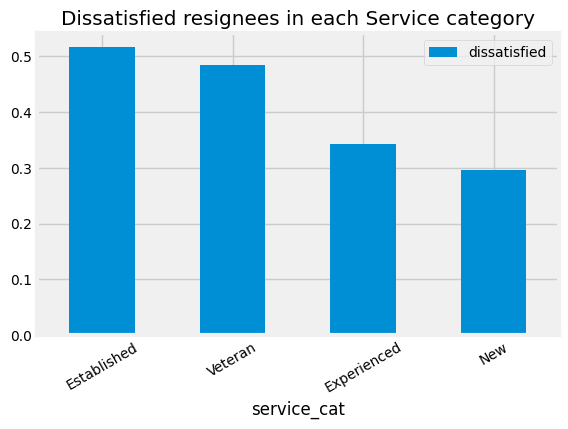

In [197]:
# Plotting the dissatified employees in each service category
%matplotlib inline
dis_pct.sort_values('dissatisfied', ascending=False).plot(
    kind='bar', rot=30, title='Dissatisfied resignees in each Service category')

Above, we created a pivot table which calcualtes the percentage of dissatisfied employees for each service category. Afterwards, we plotted the results on a  bar chart.

We can see that of the employees who took the two serveys, Established and Veteran employees are more likely to resign due to dissatisfaction. New employees are least likely to do so.

---
### How many people in each career stage resigned due to some kind of dissatisfaction?

In [199]:
diss_count = pd.pivot_table(combined_updated, index='service_cat', values='dissatisfied', aggfunc='sum')
diss_count = diss_count.sort_values(by=['dissatisfied'])
diss_count = diss_count.rename(columns={'dissatisfied':'dissatisfied_count'})
diss_count

,dissatisfied_count
service_cat,
Established,32.0
New,57.0
Experienced,59.0
Veteran,66.0


Above we see the number of people in each service category who left due to dissatisfaction.

## Dissatisfied by age

Below we will clean the `age` column by grouping the employees in age groups. Afterwards, we will answer the question:

- How many people in each age group resgined due to some kind of dissatisfaction?

In order to clean the data, we will divide the age groups like this:

- 20s
- 30s
- 40s
- 50s
- 60+

In [200]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
26  30           32
36  40           32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [201]:
combined_updated['age'] = combined_updated['age'].astype('str')

In [202]:
def age(s):
    if s[0] == '2':
        return '20s'
    elif s[0] == '3':
        return '30s'
    elif s[0] == '4':
        return '40s'
    elif s[0] == '5':
        return '50s'
    elif s[0] == '6':
        return '60s'
    elif s == 'nan':
        return np.nan

In [203]:
combined_updated['age'] = combined_updated['age'].apply(age)

In [204]:
combined_updated['age'].value_counts()

40s    174
20s    139
30s    134
50s    126
60s     23
Name: age, dtype: int64

In [205]:
age_diss_count = pd.pivot_table(combined_updated, index='age', values='dissatisfied', aggfunc='sum')
age_diss_count = age_diss_count.sort_values(by=['dissatisfied'])
age_diss_count = age_diss_count.rename(columns={'dissatisfied': 'dissatisfied_count'})
age_diss_count

,dissatisfied_count
age,
60s,12.0
30s,48.0
20s,49.0
50s,51.0
40s,66.0


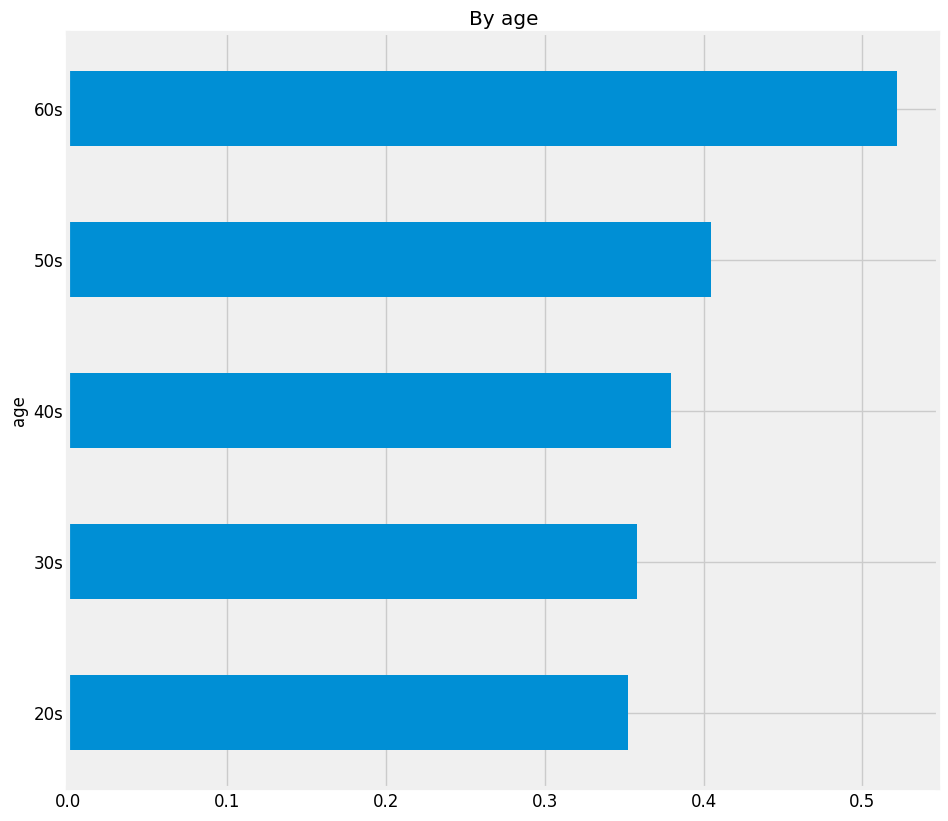

In [206]:
age_perc = pd.pivot_table(combined_updated, index='age', values='dissatisfied')
age_perc = age_perc.sort_values(by=['dissatisfied'])
age_perc.plot(kind='barh', legend=False, figsize=(10,10), fontsize=12, title = 'By age')

In the charts above we see:

1. The number of people in each age group who resigned due to dissatisfaction.
2. The percent of people in each age group who resigned due to dissatisfaction.

Overall, the number of young employees of the two institues who resigned due to job dissatisfaction is lowest. This might be due to the fact that they were early in their career development and were still looking for a career path to follow.

# Dissatisfied by institute

- Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

In [207]:
institute_count = pd.pivot_table(combined_updated, index='institute', values='dissatisfied', aggfunc='sum')
institute_count = institute_count.rename(columns={'dissatisfied': 'dissatisfied_count'})
institute_count

,dissatisfied_count
institute,
DETE,149.0
TAFE,91.0


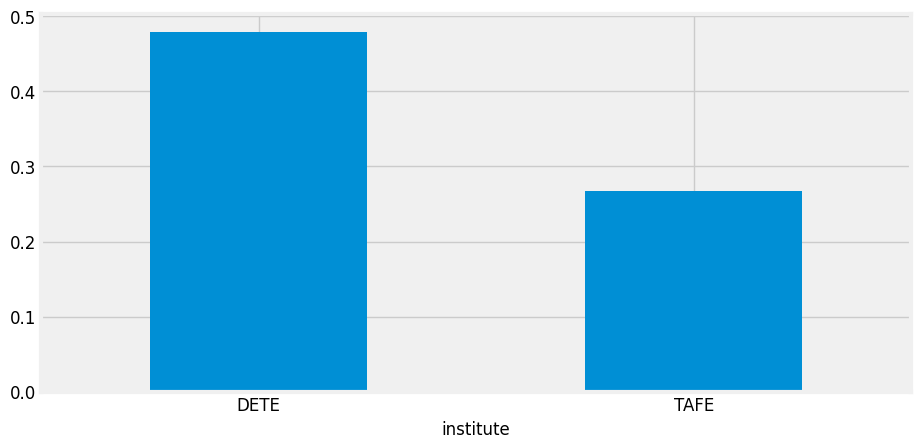

In [208]:
by_perc = pd.pivot_table(combined_updated, index='institute', values='dissatisfied')
by_perc.plot(kind='bar', rot=360, figsize=(10,5), fontsize=12, legend=False)

In the charts above we see:

1. The number of people from each institute who resigned due to dissatisfaction.
2. The percent of people from each institute who resigned due to dissatisfaction.

It seems that DETE employees have resigned due to job dissatisfaction more often than TAFE employees.

### Dissatisfaction by gender

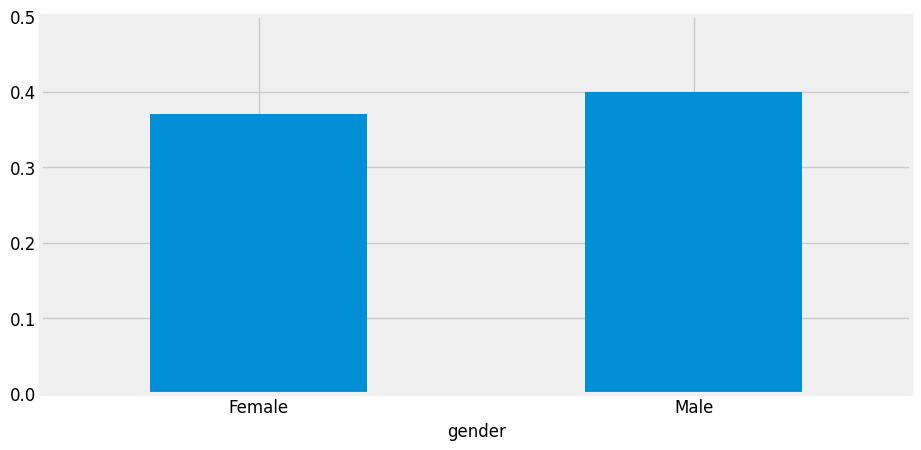

In [209]:
by_gender = pd.pivot_table(combined_updated, index='gender', values='dissatisfied')
by_gender.plot(kind='bar', rot=360, figsize=(10,5), fontsize=12, ylim=[0, 0.5], legend=False)

### Dissatisfied by employment status


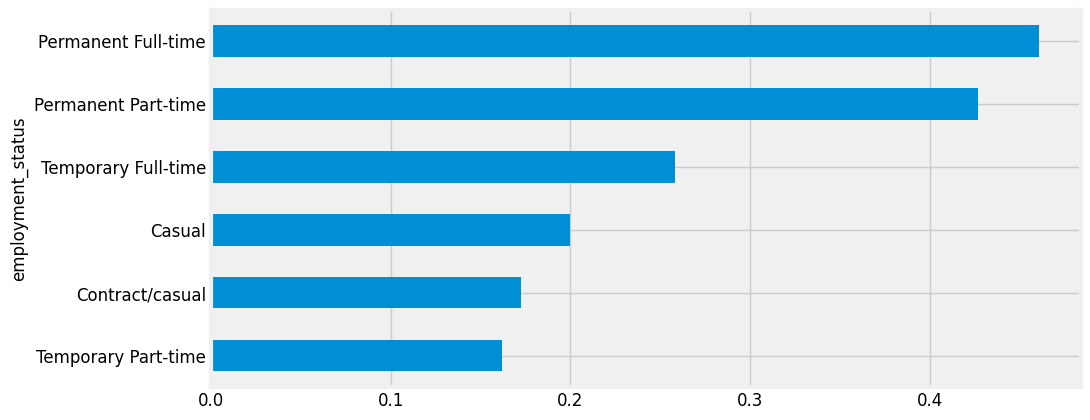

In [210]:
by_status = pd.pivot_table(combined_updated, index='employment_status', values='dissatisfied')
by_status = by_status.sort_values(by=['dissatisfied'])
by_status.plot(kind='barh', figsize=(10,5), fontsize=12, legend=False)

### Dissatisfied by position

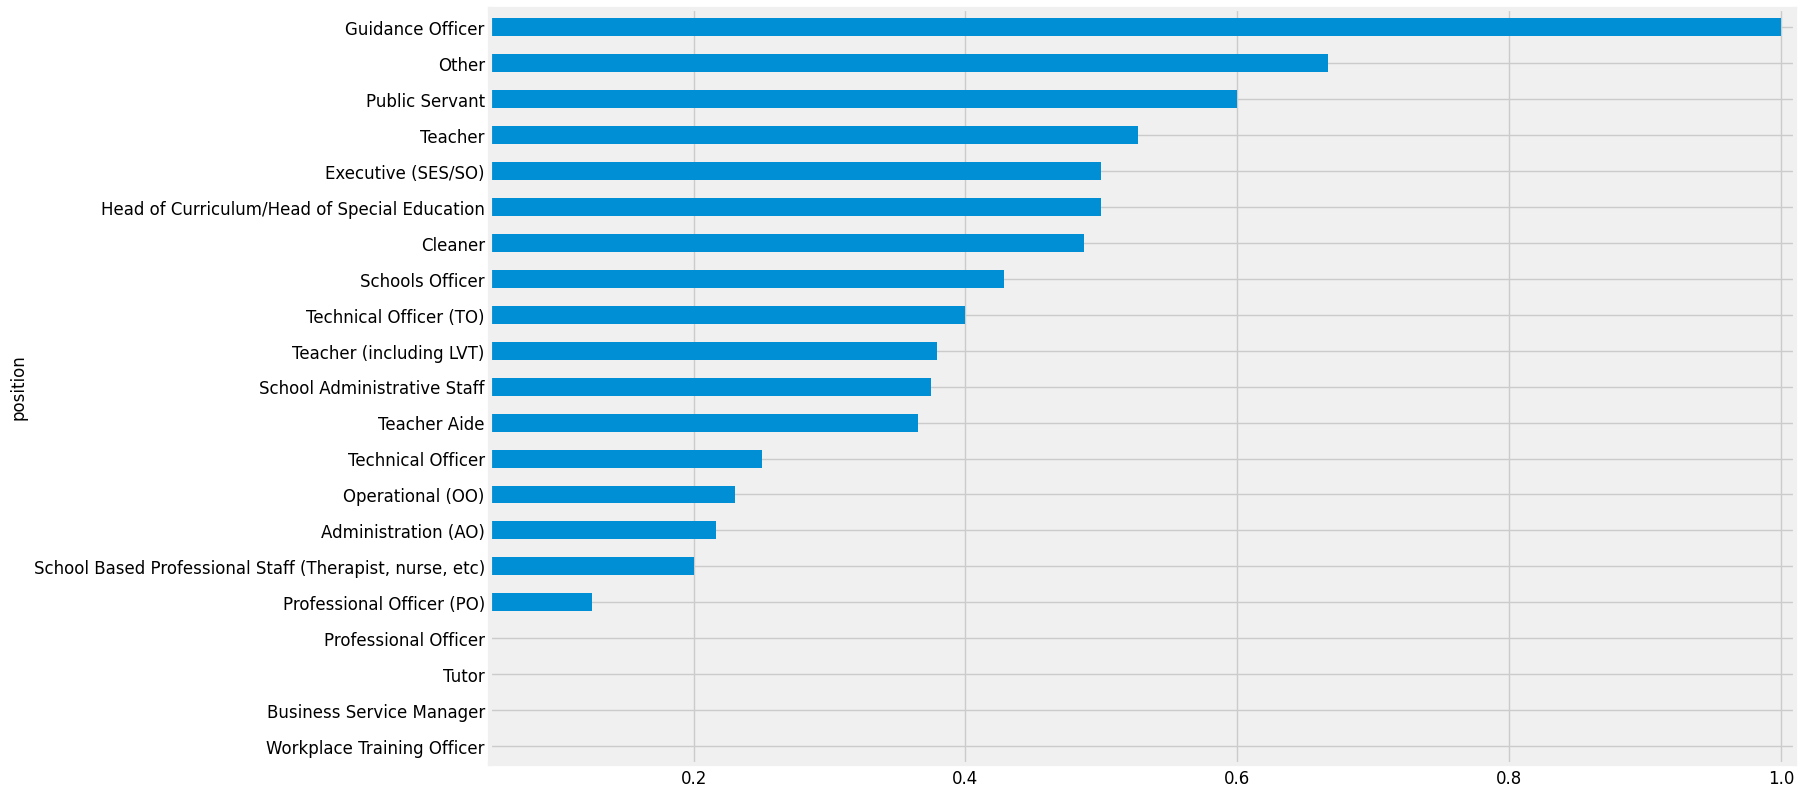

In [211]:
by_position = pd.pivot_table(combined_updated, index='position', values='dissatisfied')
by_position = by_position.sort_values(by=['dissatisfied'])
by_position.plot(kind='barh', figsize=(15, 10), fontsize=12, legend=False, xlim=[0.05, 1.01])

### Dissatisfied by Age and Gender


In [212]:
gender_age = pd.pivot_table(combined_updated, index=['gender', 'age'], values='dissatisfied')
gender_age

dissatisfied
gender age              
Female 20s      0.375000
       30s      0.336842
       40s      0.389313
       50s      0.375000
       60s      0.416667
Male   20s      0.285714
       30s      0.421053
       40s      0.357143
       50s      0.444444
       60s      0.750000

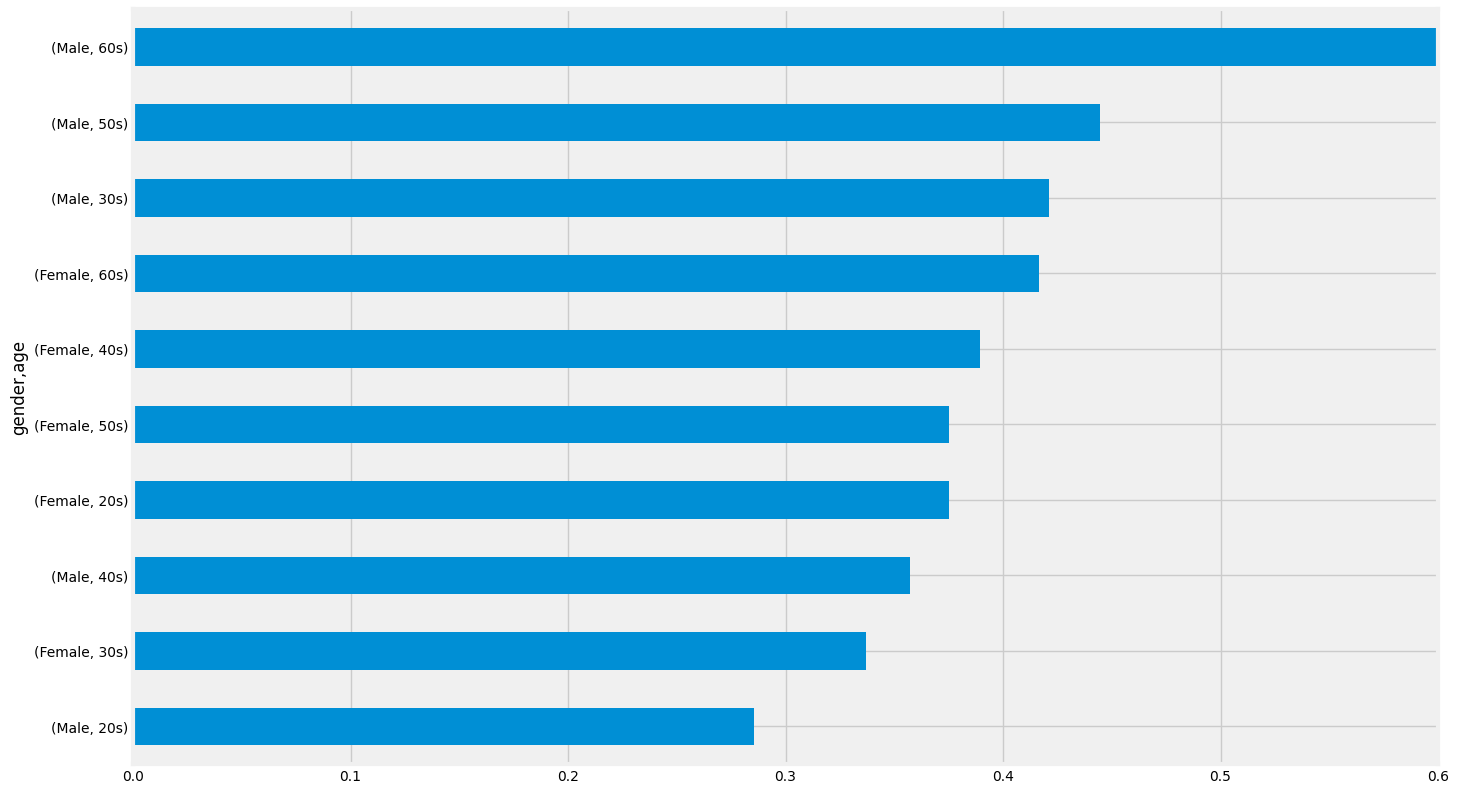

In [213]:
gender_age = gender_age.sort_values(by=['dissatisfied'])
gender_age.plot(kind='barh', figsize=(15, 10), legend=False, xlim=[0, 0.60])

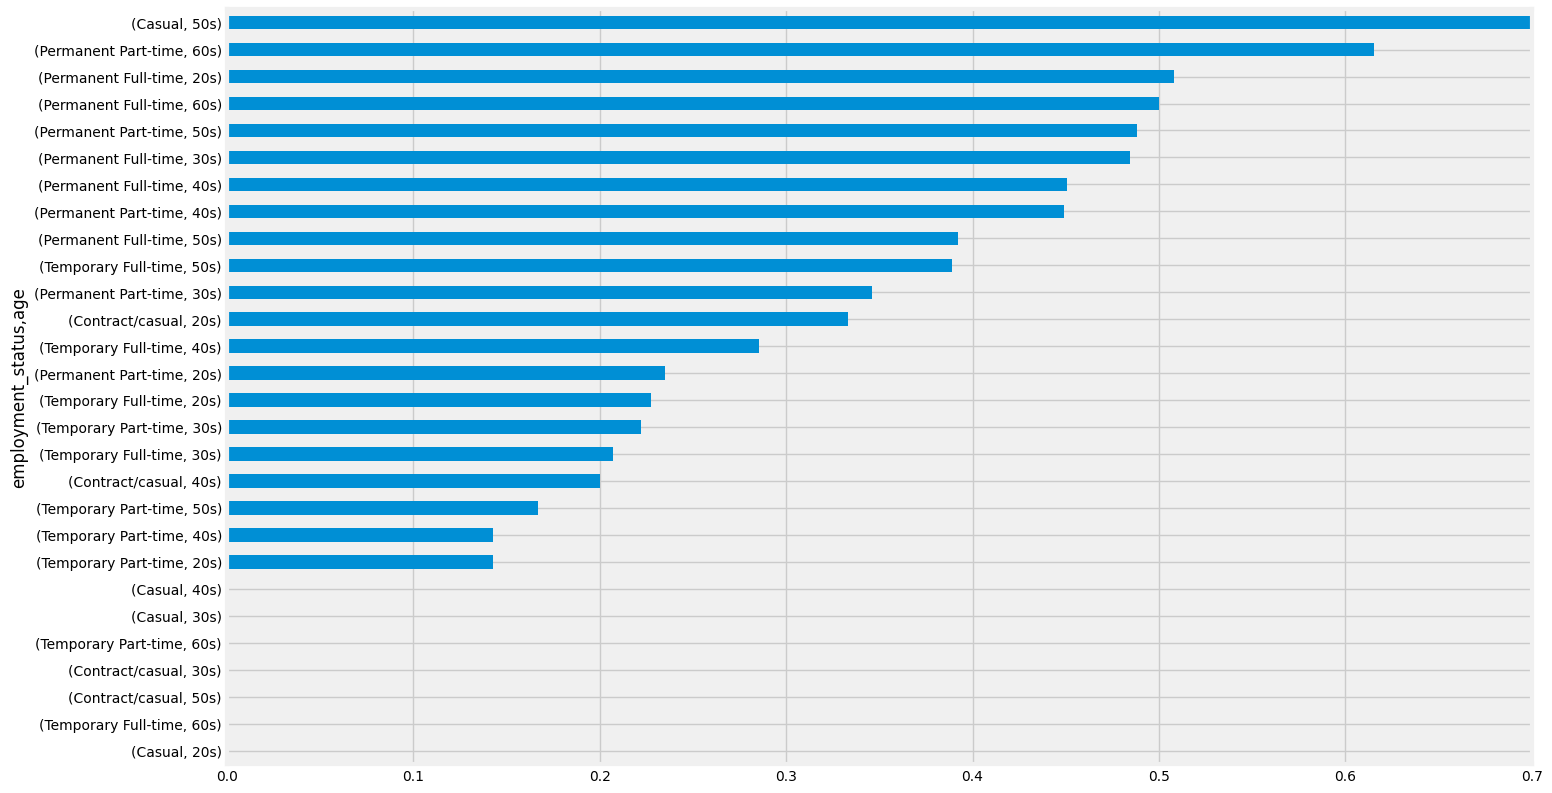

In [214]:
status_age = pd.pivot_table(combined_updated, index=['employment_status', 'age'], values='dissatisfied')
status_age = status_age.sort_values(by=['dissatisfied'])
status_age.plot(kind='barh', figsize=(15, 10), legend=False, xlim=[0, 0.7])

# Conclusion

In this project, we analyzed the exit surveys of employees of the DETE and TAFE institutes. We focused on those who resiged due to some sort of job dissatisfaction and concluded that:

- young, inexperienced employees resigned least often due to job dissatisfaction;
- DETE employees resigned more often due to job dissatisfaction than TAFE employees;
- Male employees resigned more often due to job dissatisfaction than Female employees;
- Males in their 20s resigned due to dissatisfaction least often;
- 100% of the resigned Guidence officers who filled in the surveys resigned due to dissatisfaction.